In [2]:
from sklearn.manifold import TSNE
import h5py

In [3]:
h5f = h5py.File('./Container/train', 'r')
features = h5f['features_boolean'][:]
labels = h5f['labels_int_enc'][:]
h5f.close()

In [4]:
n_components = 2

model = TSNE(n_components=n_components)
result = model.fit_transform(features)

C:\Users\kami.DESKTOP-5P4EH18\anaconda3\envs\pytorch\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\kami.DESKTOP-5P4EH18\anaconda3\envs\pytorch\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
C:\Users\kami.DESKTOP-5P4EH18\AppData\Local\Temp\ipykernel_11340\1885788450.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  temp_fig.show()
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence

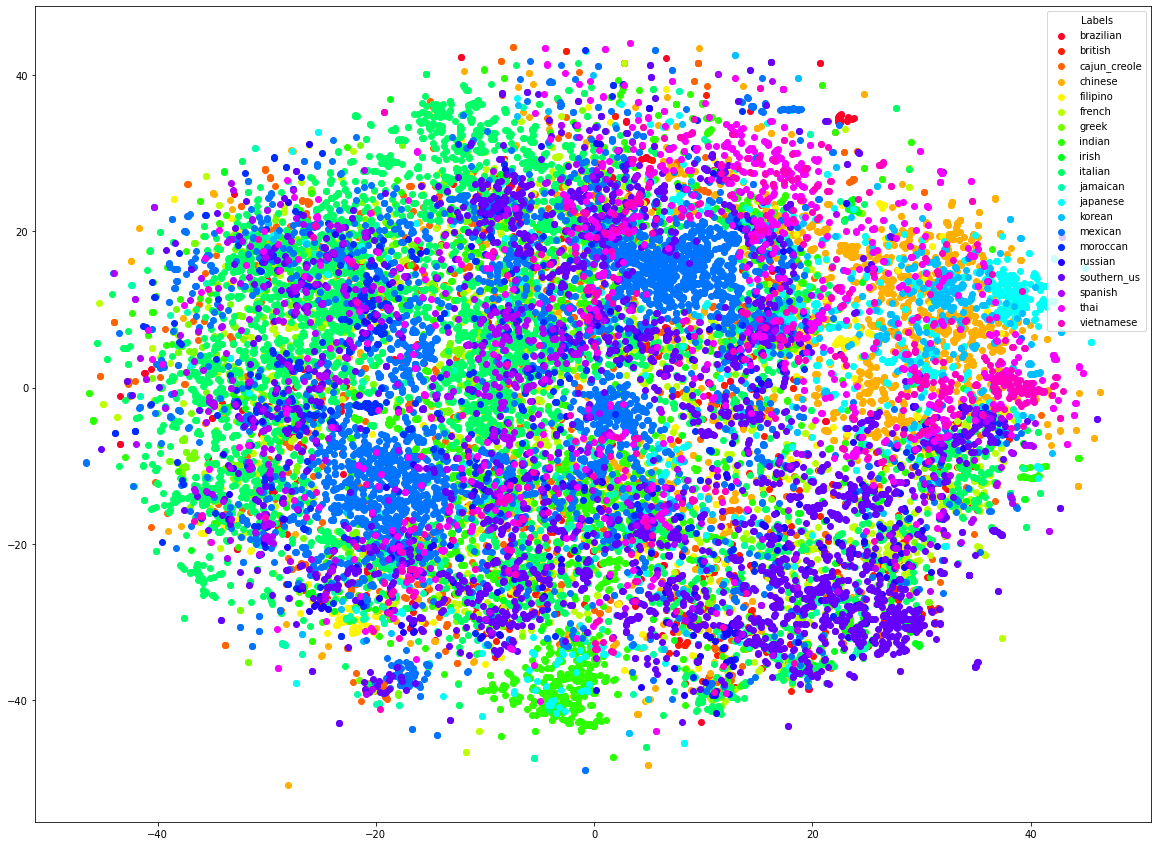

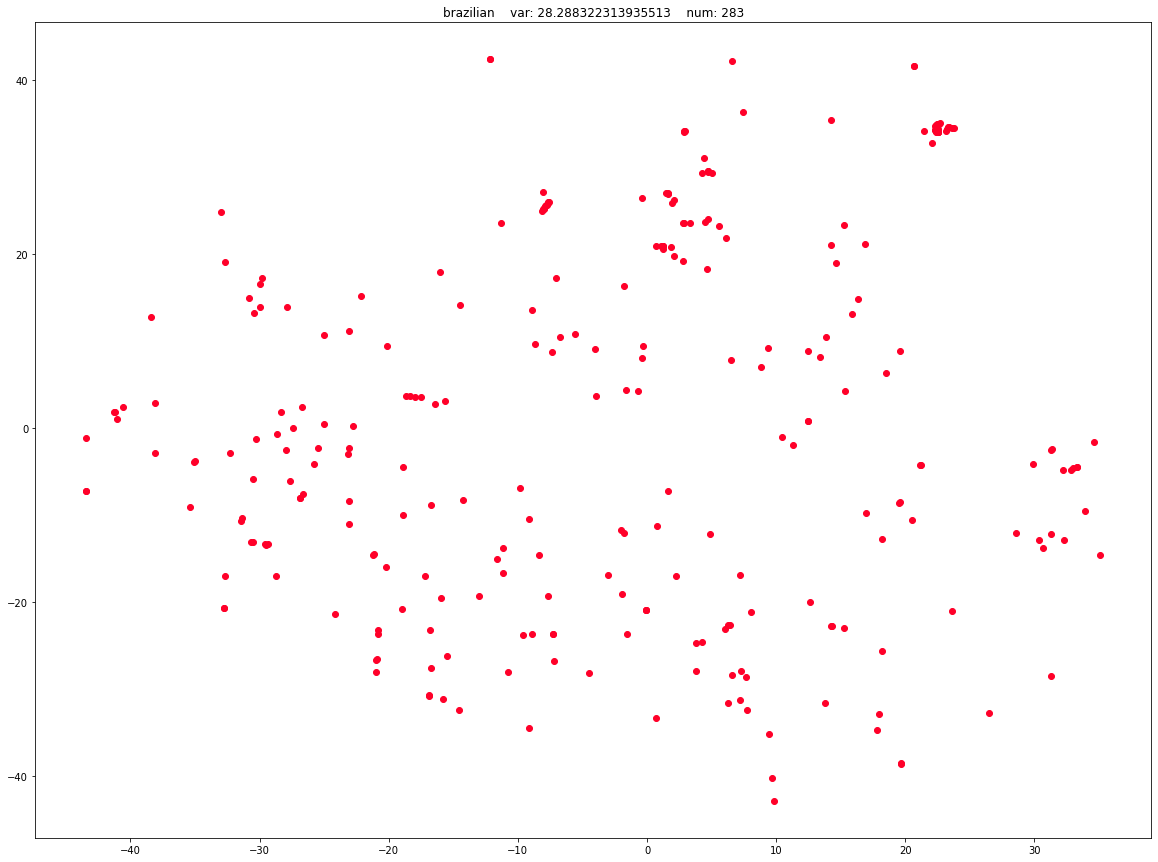

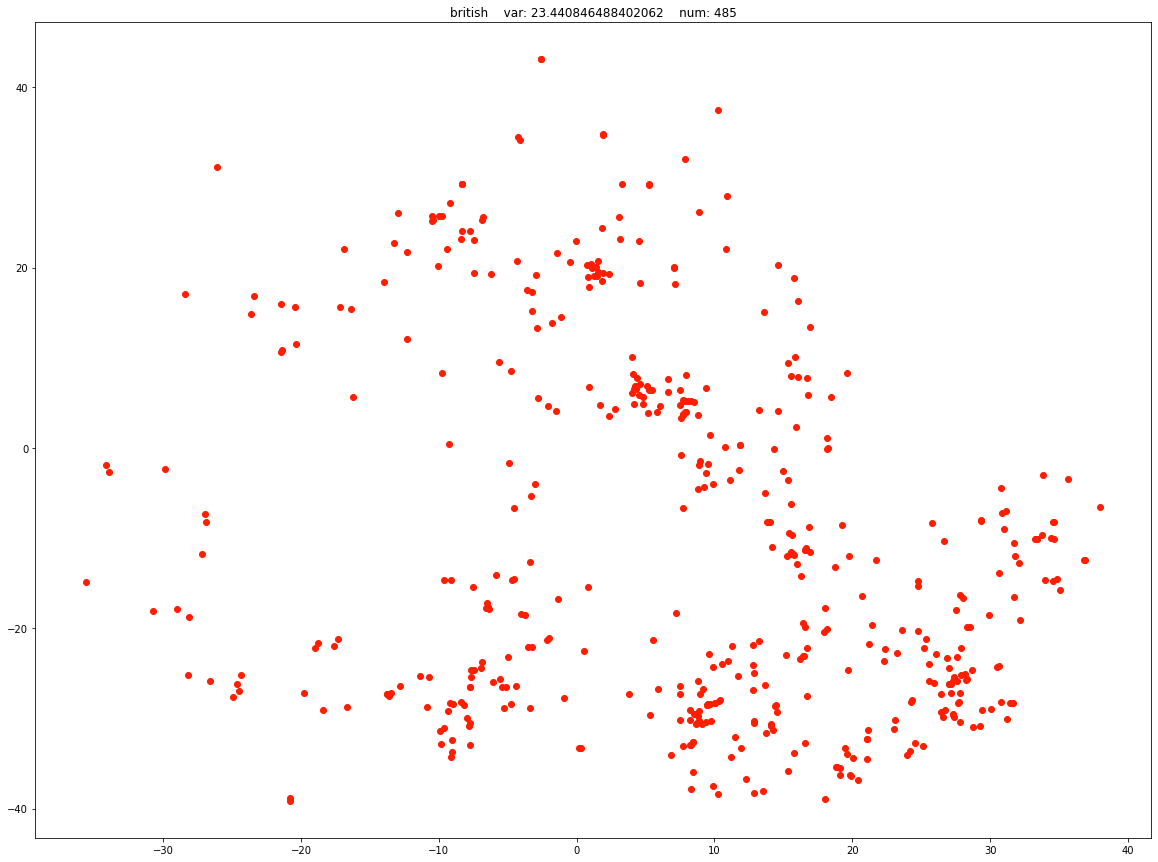

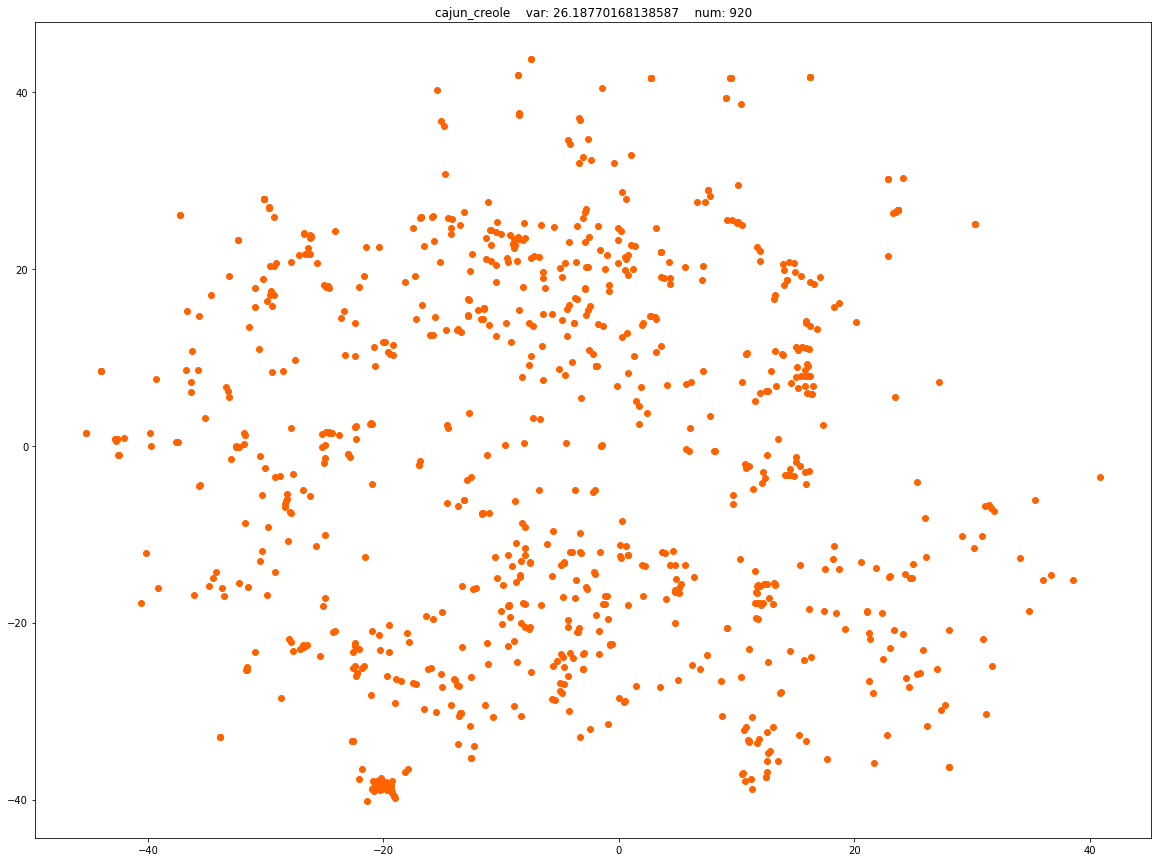

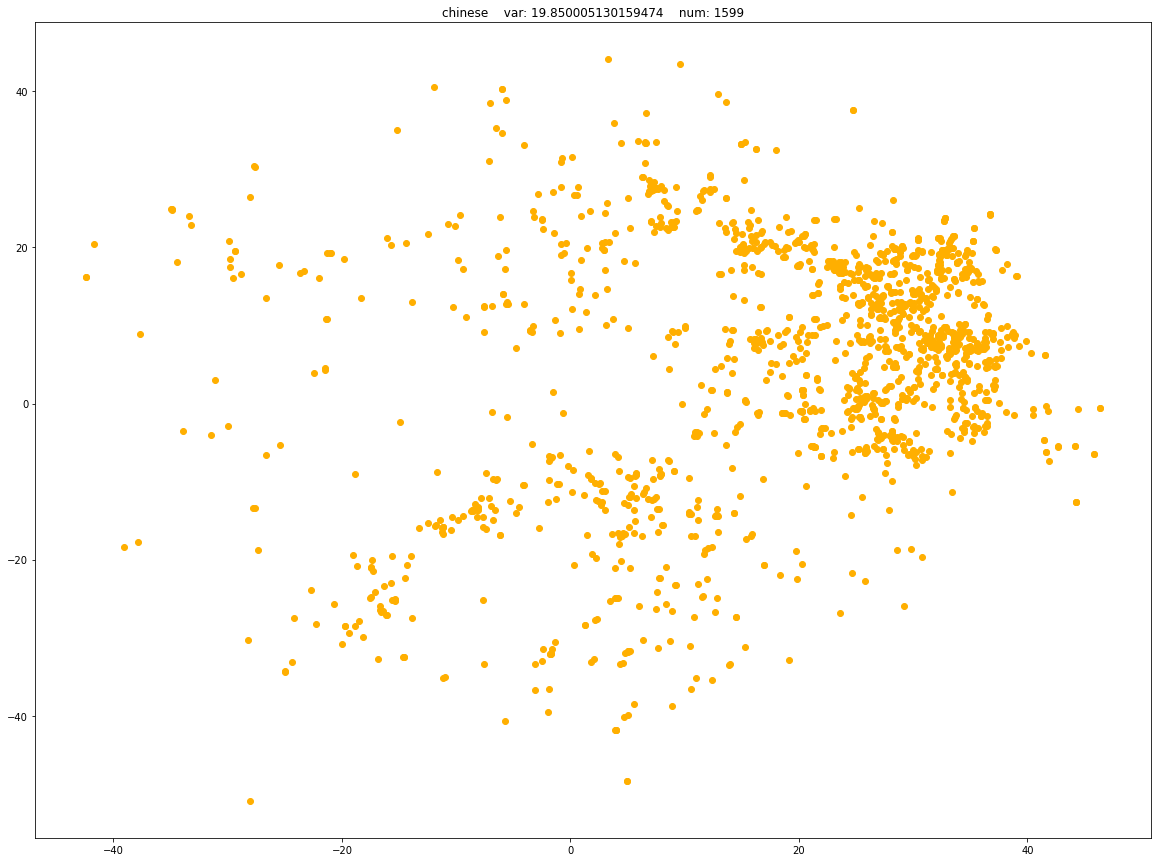

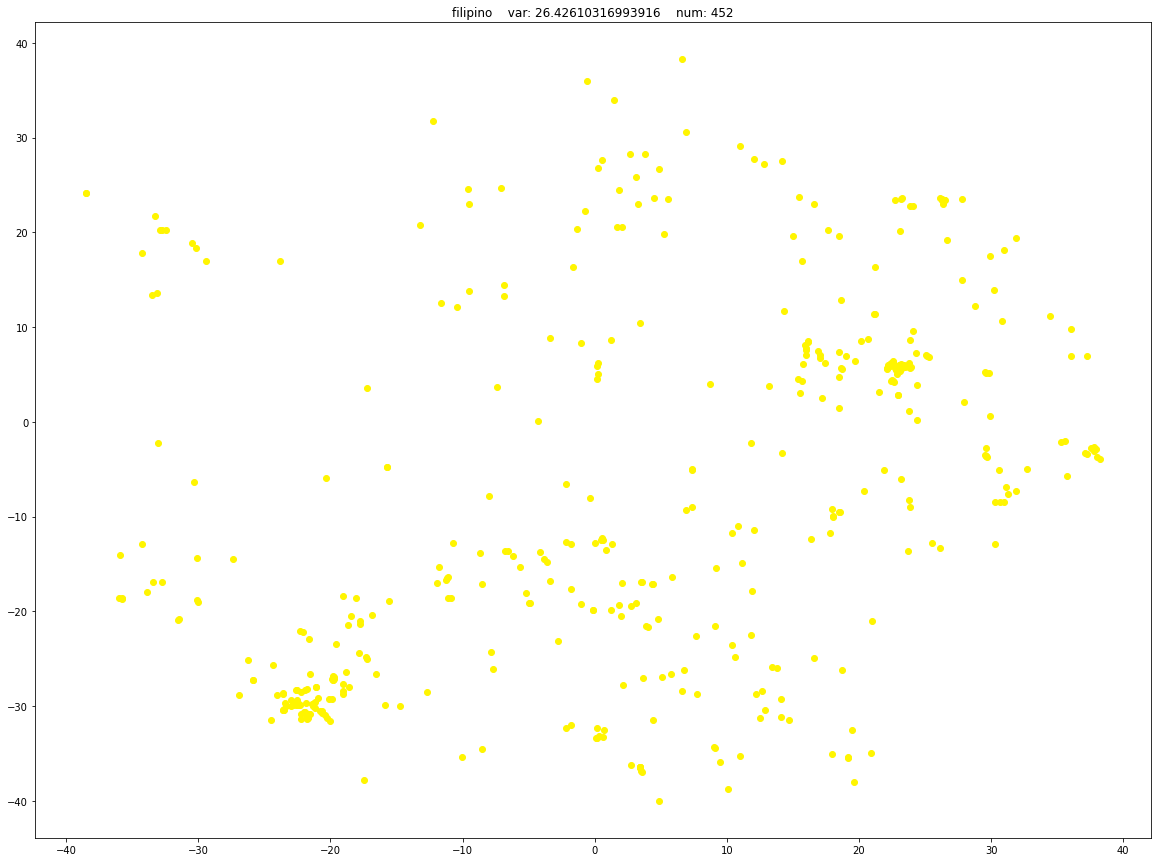

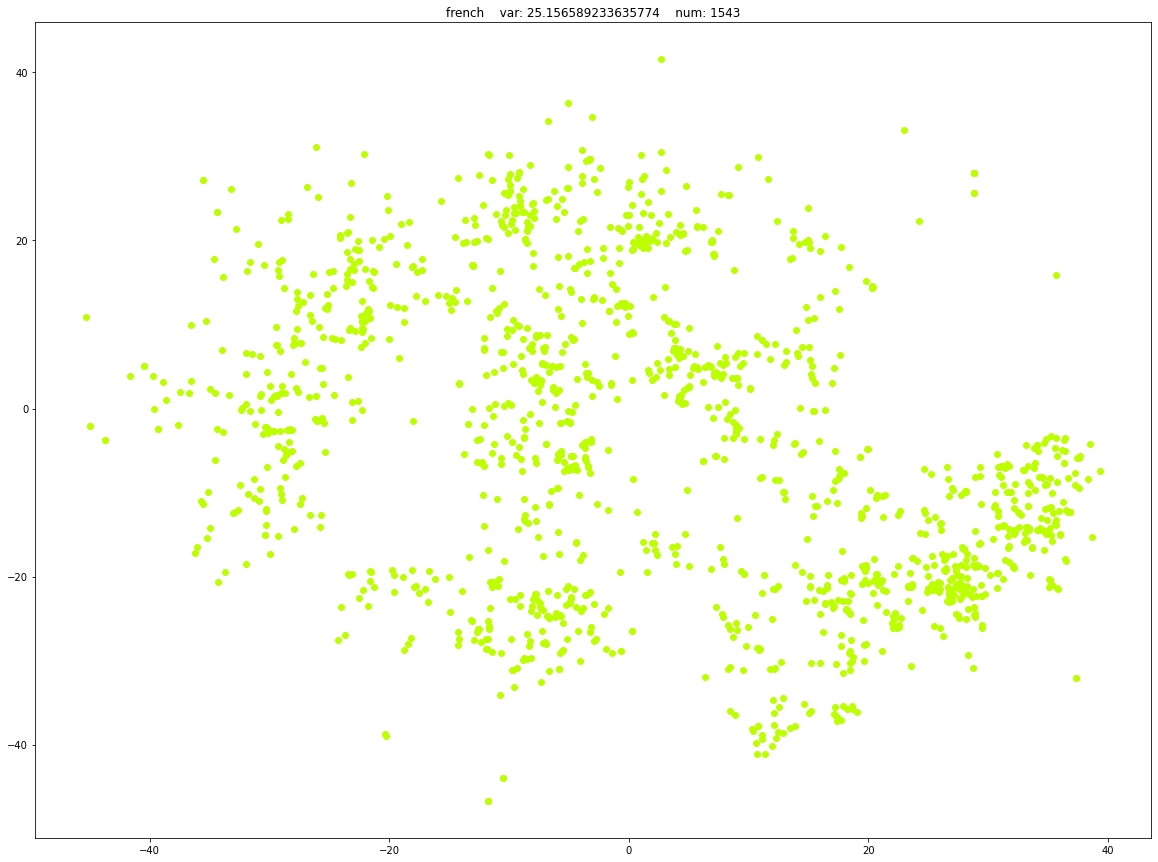

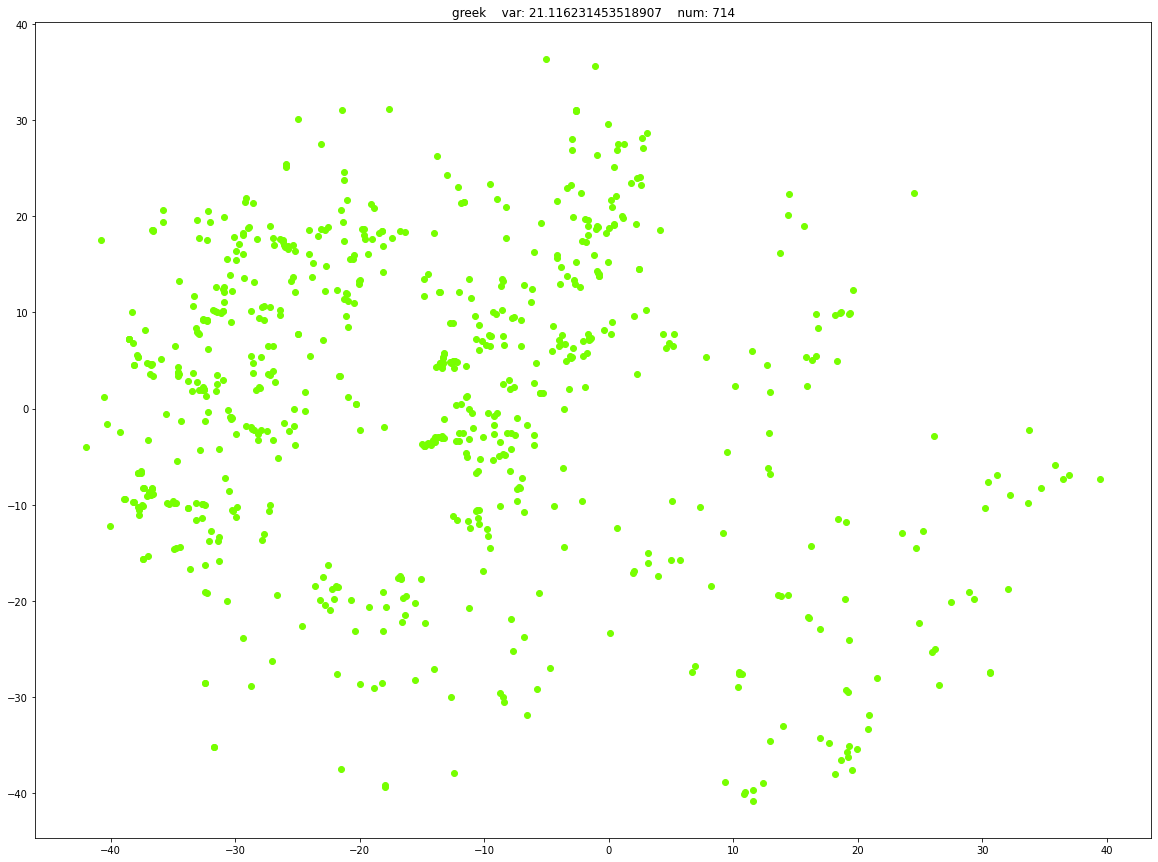

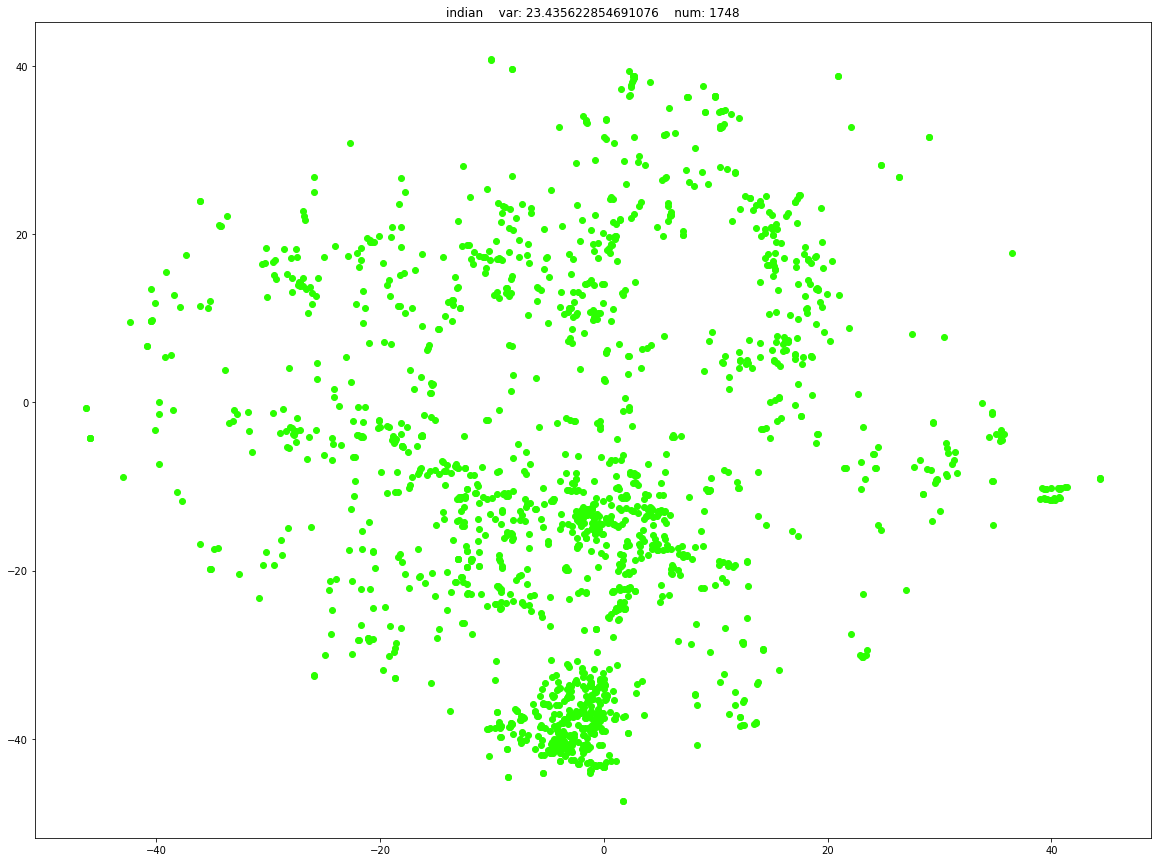

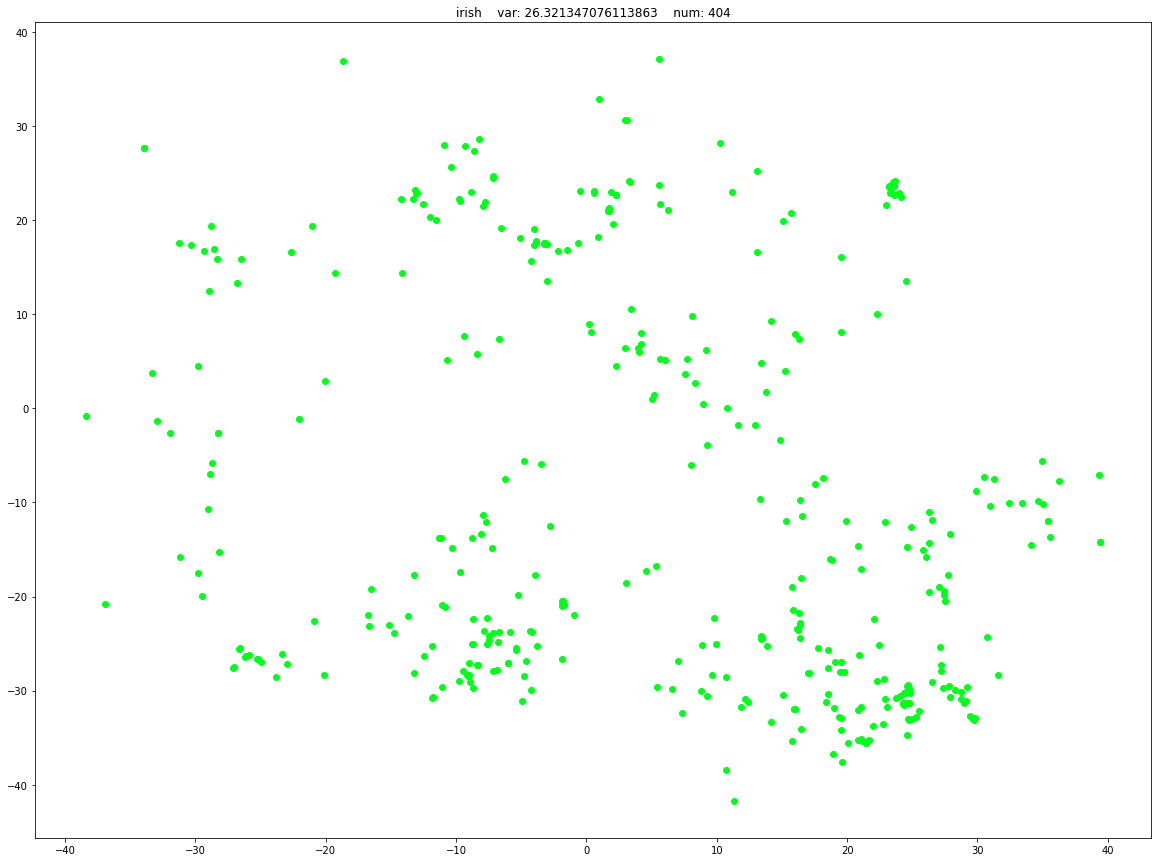

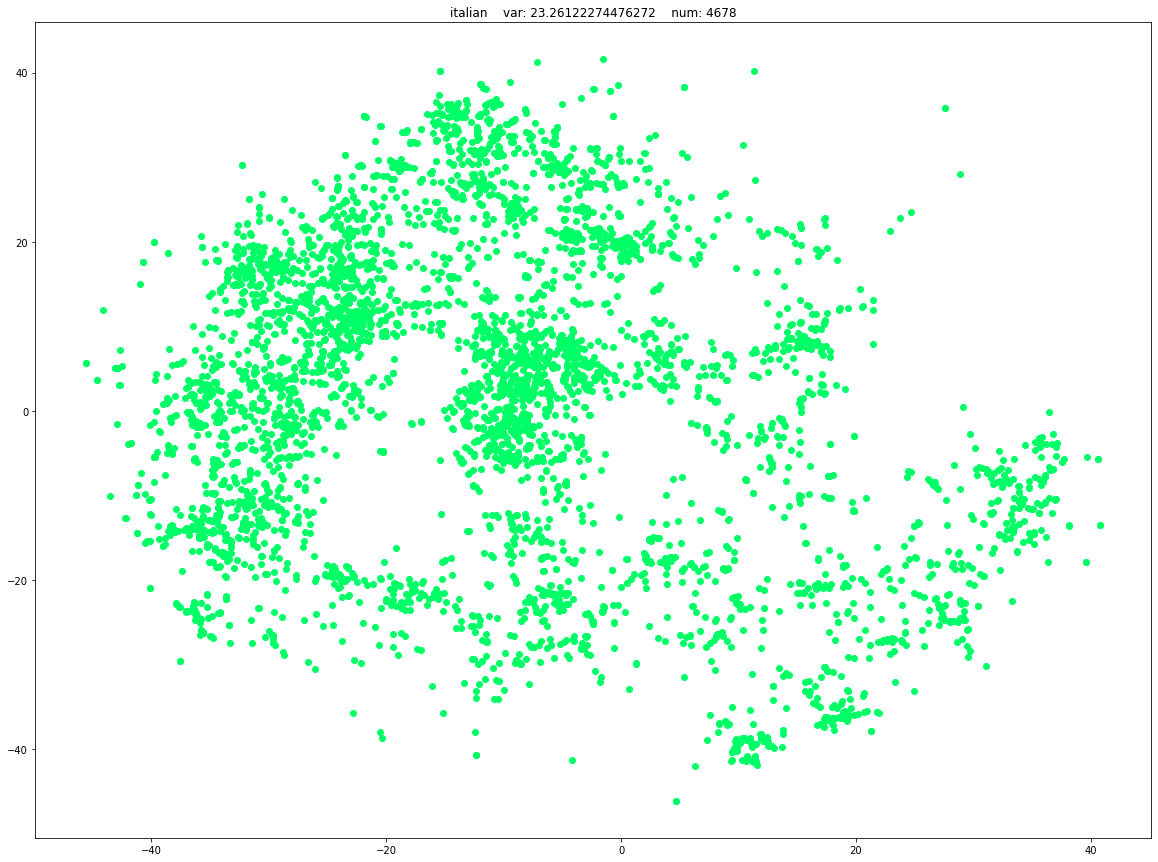

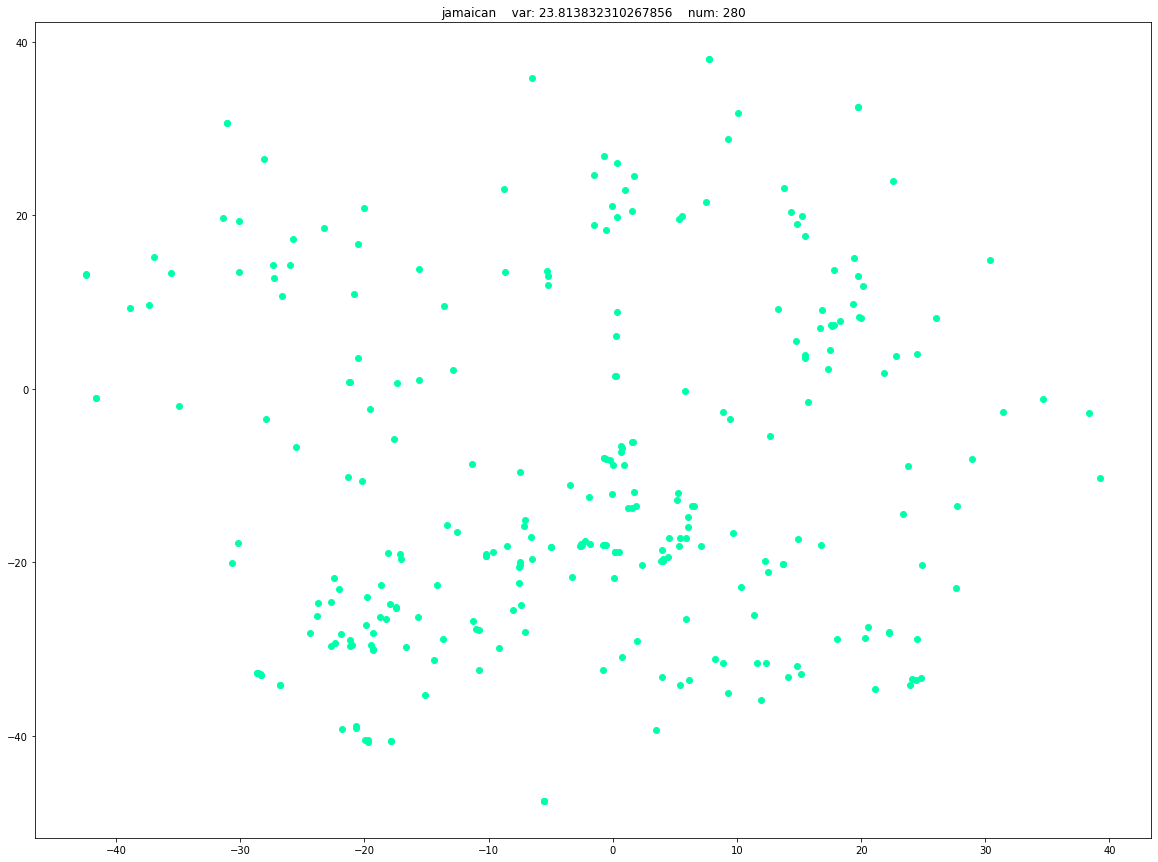

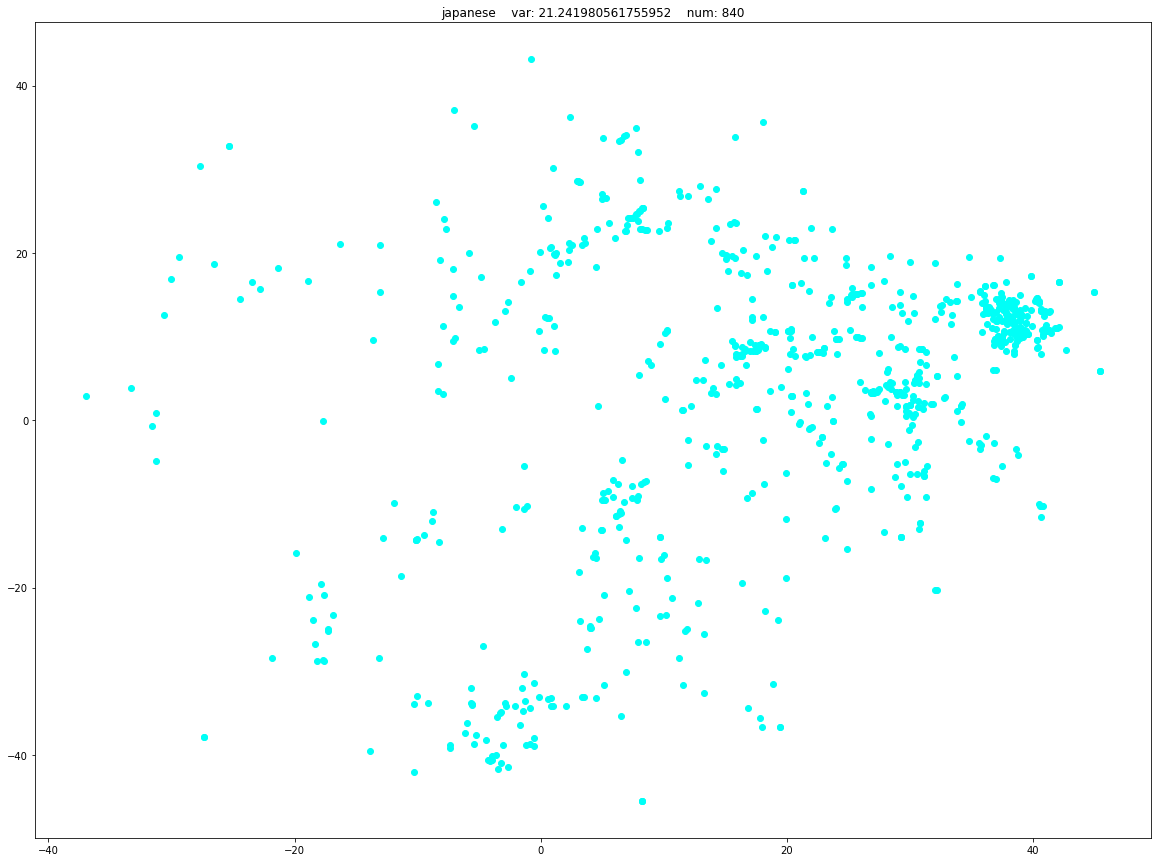

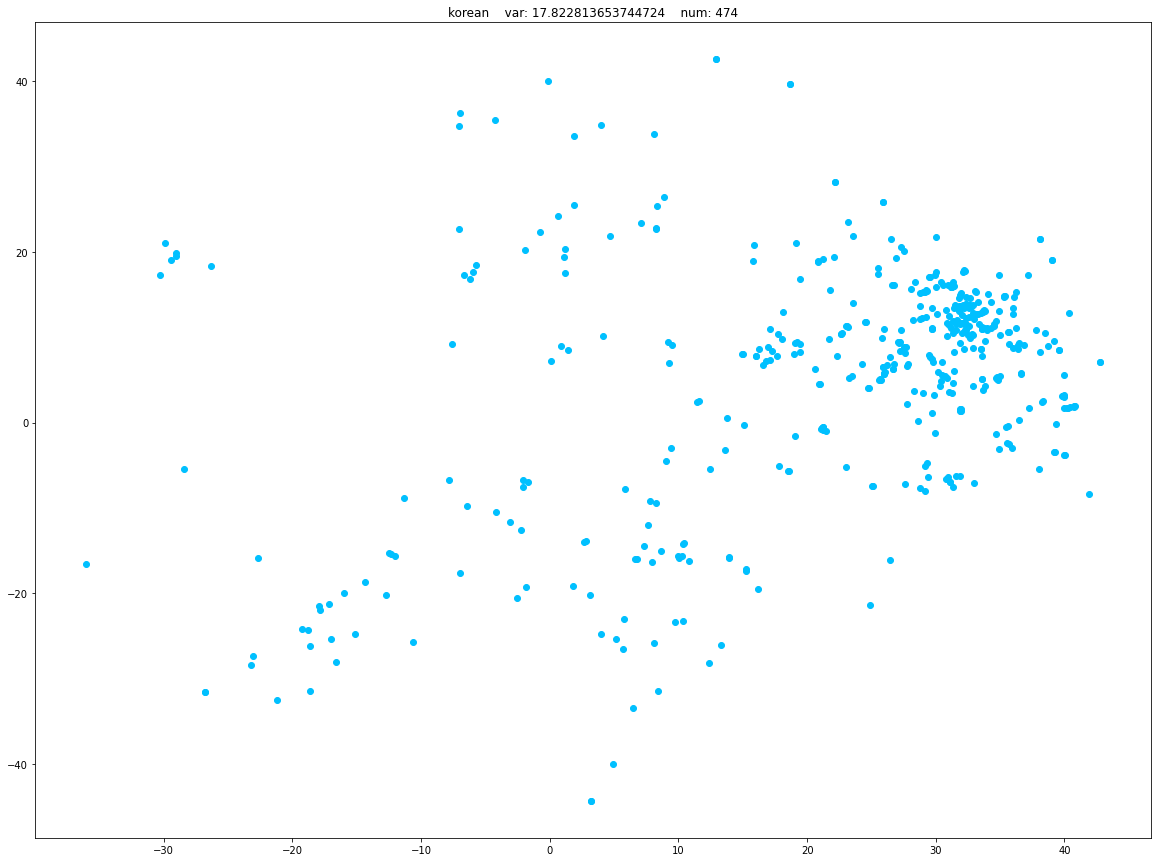

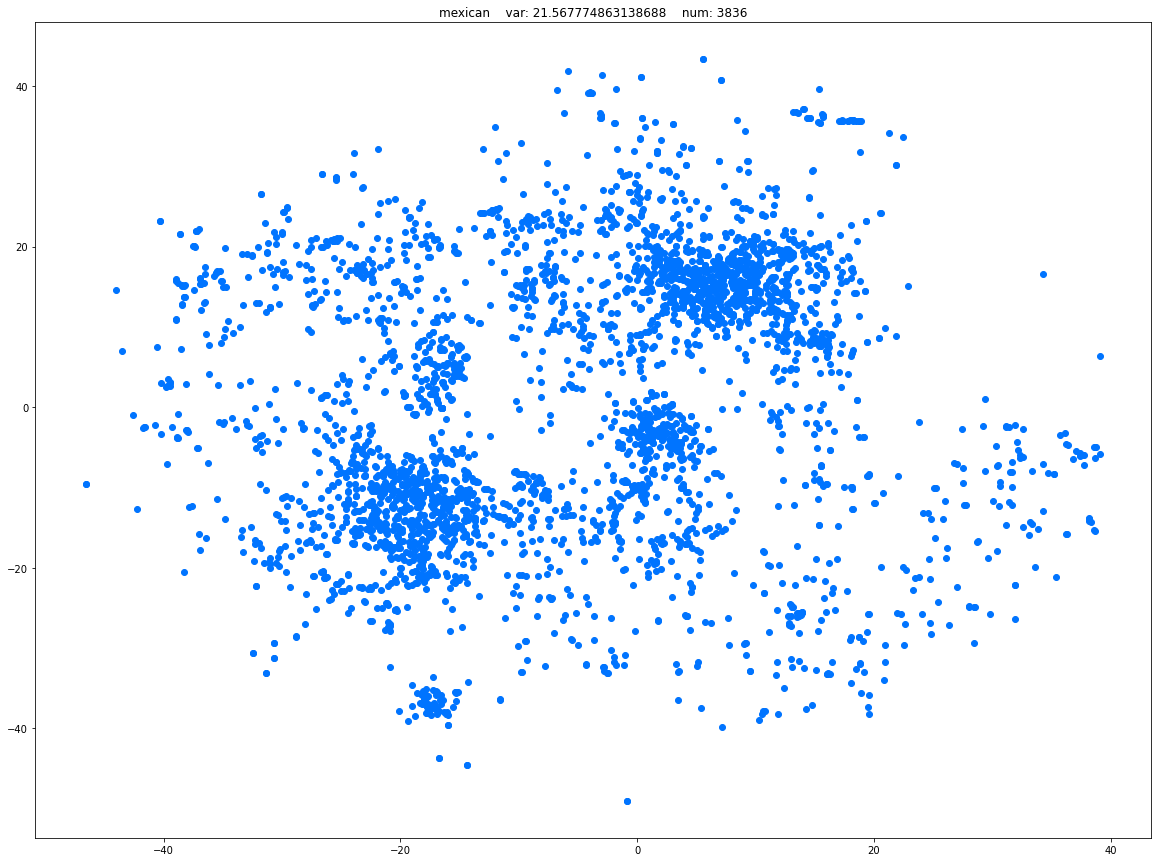

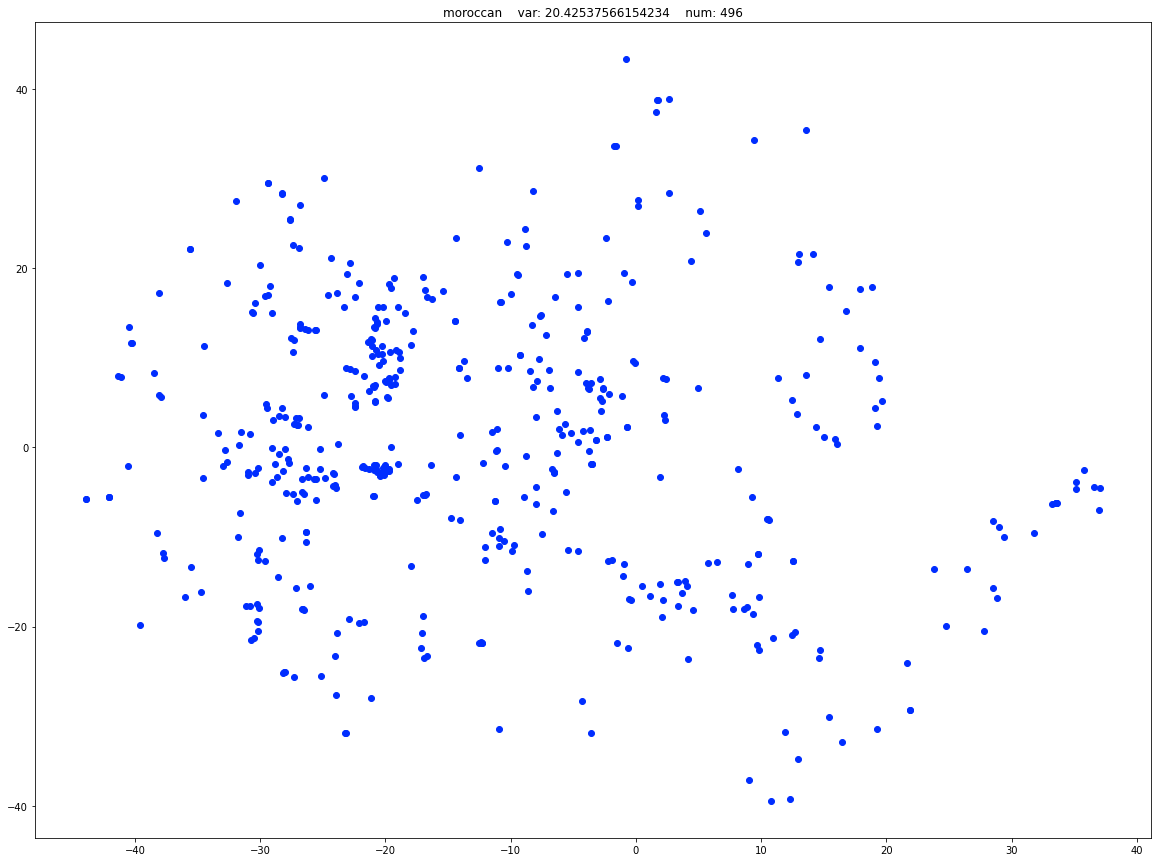

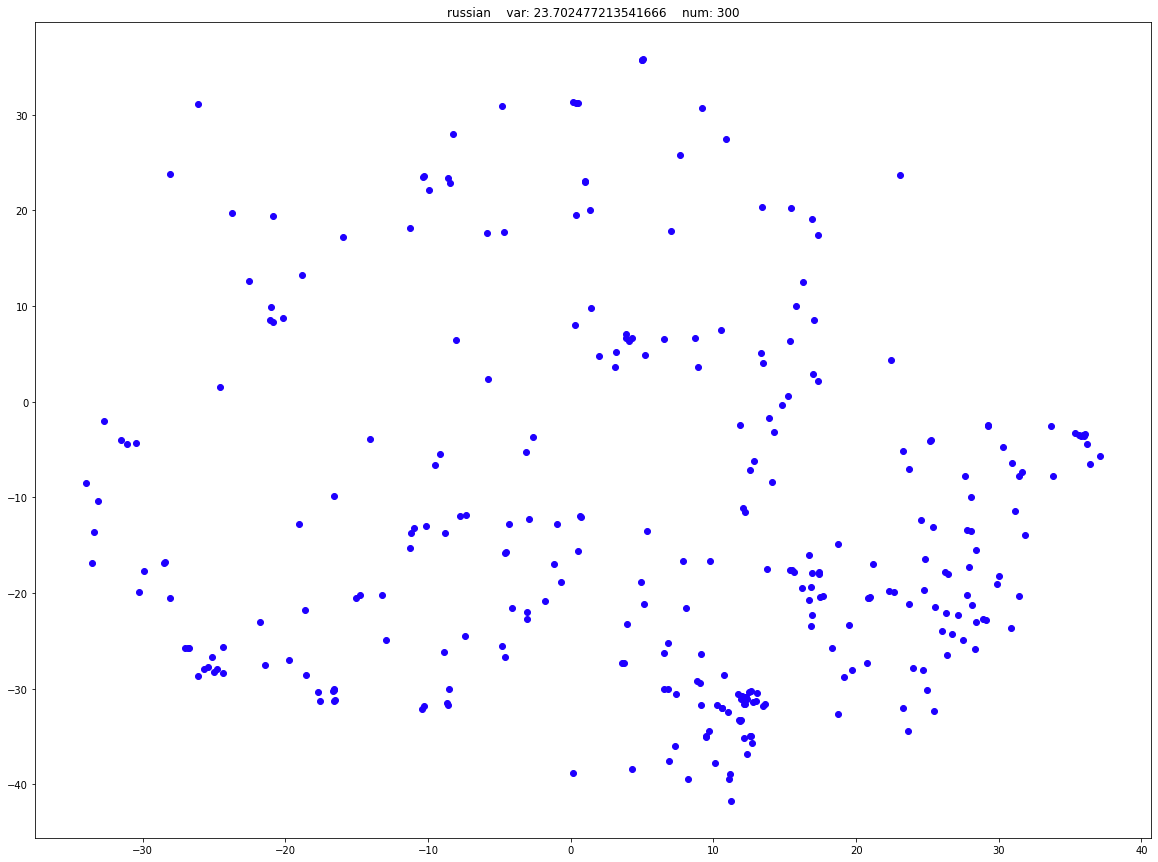

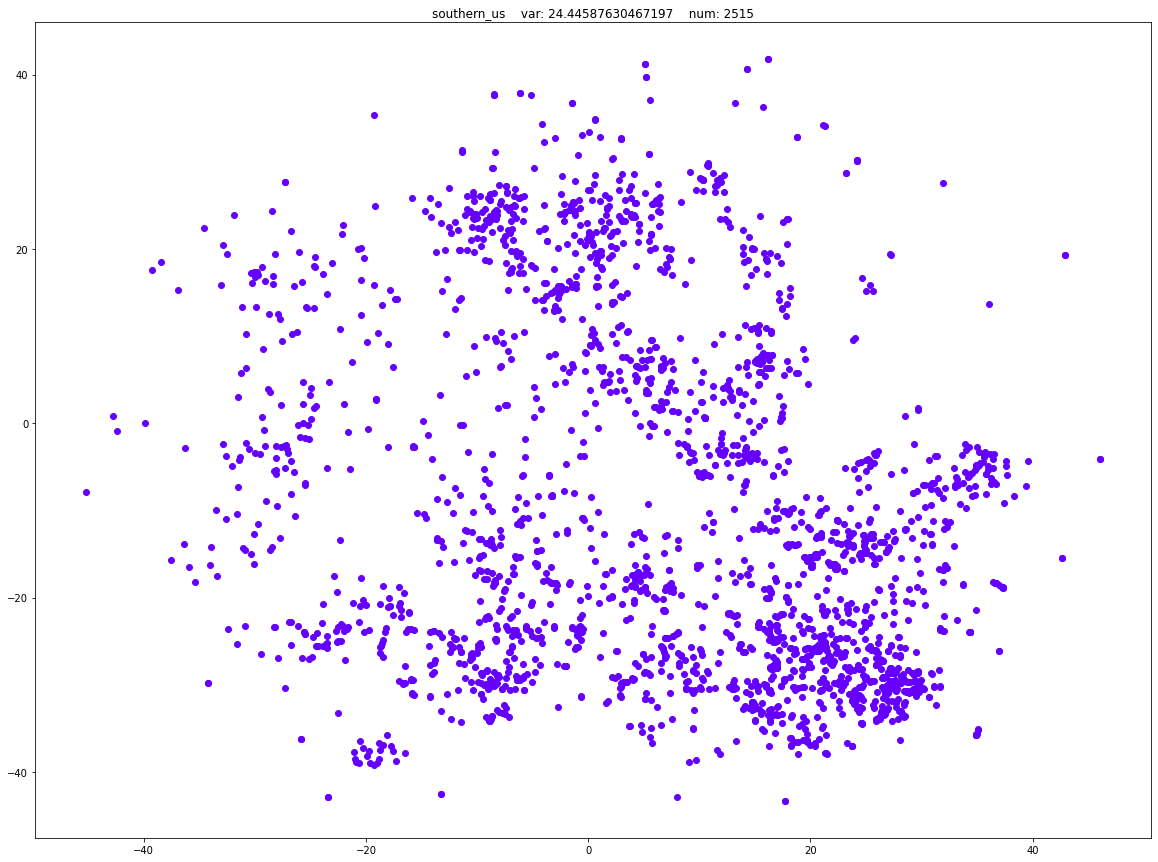

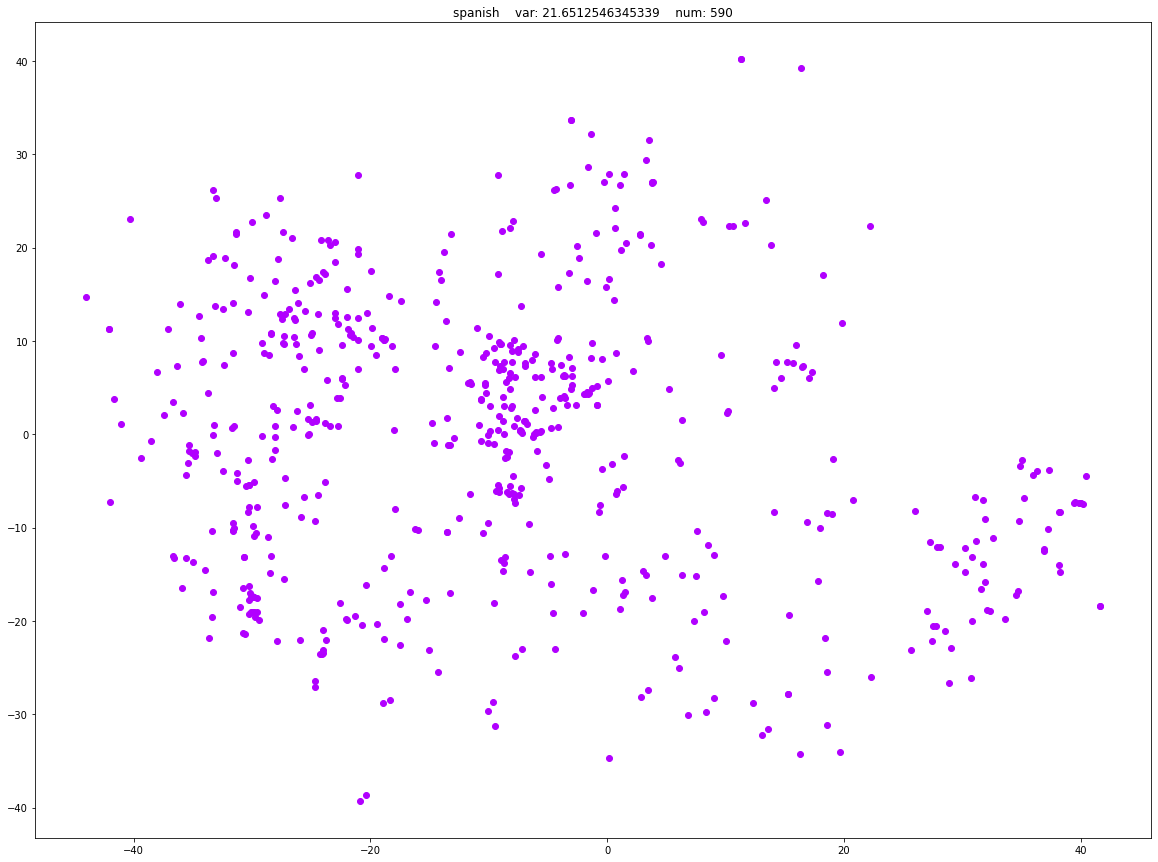

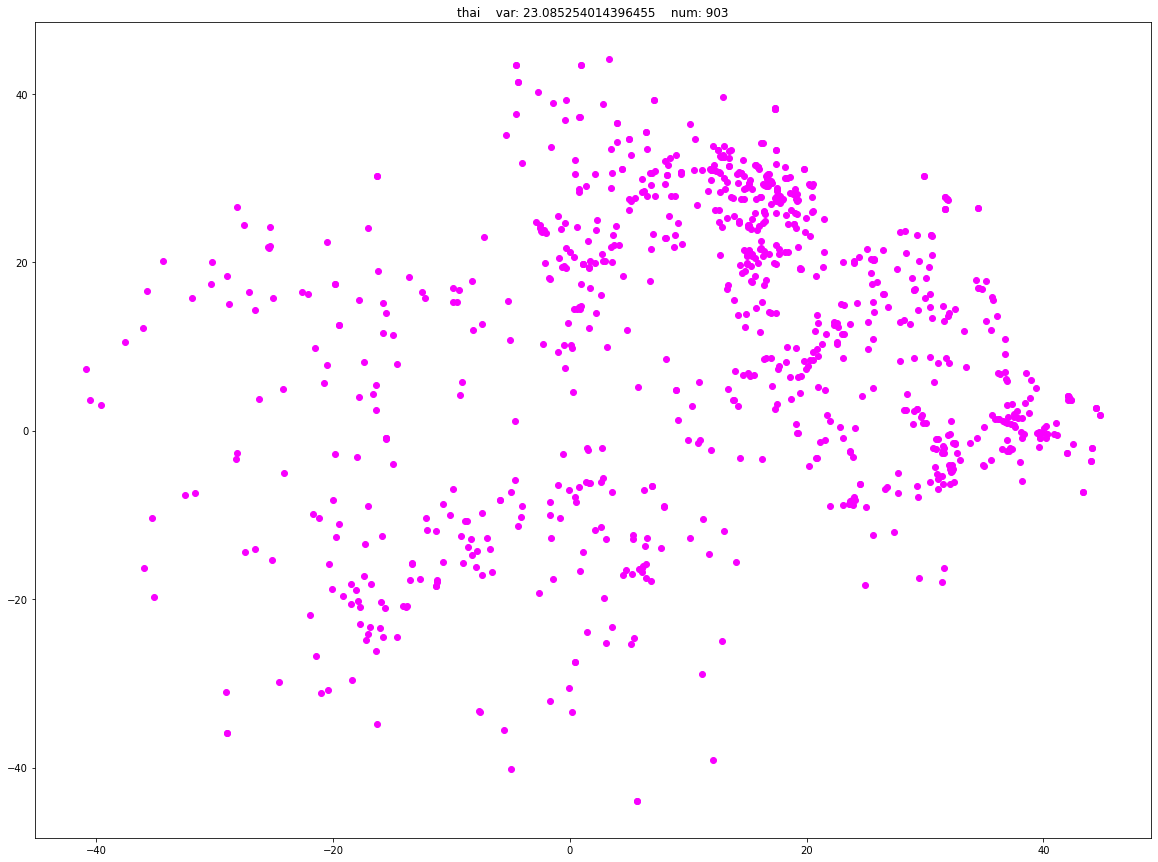

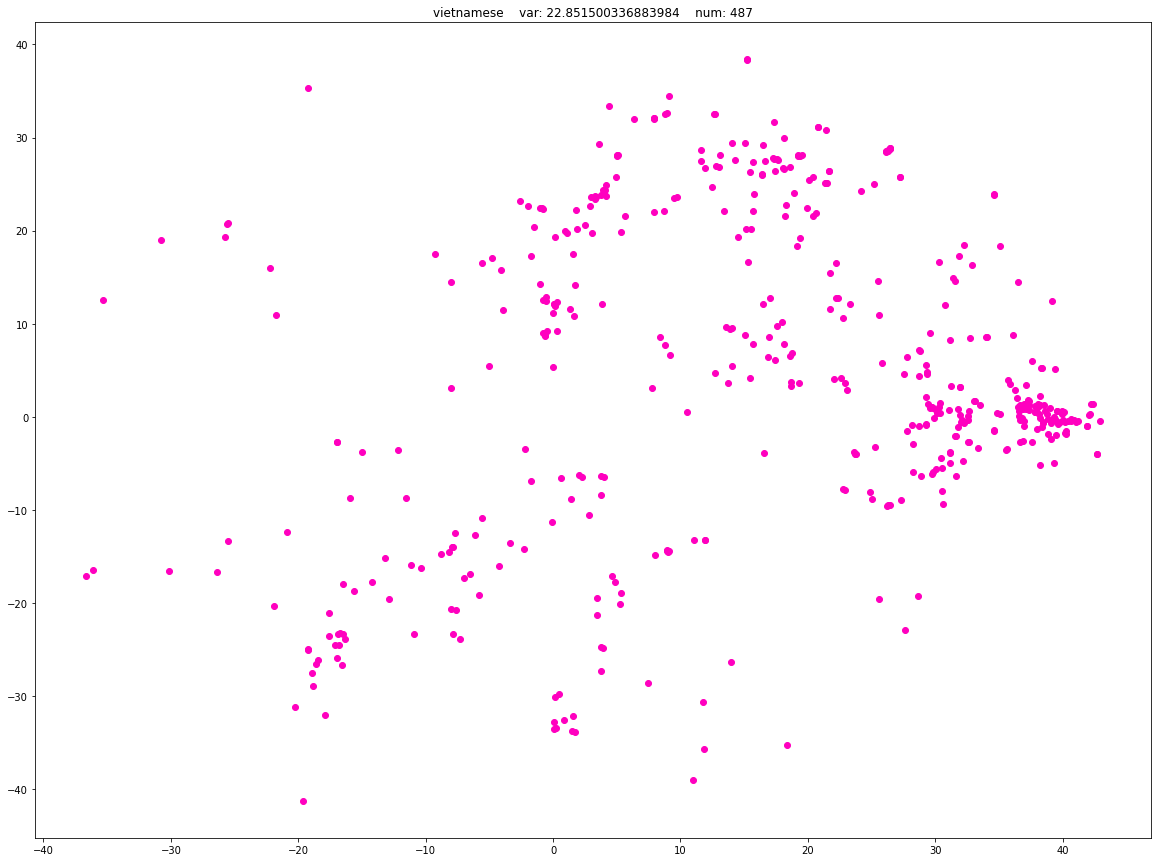

In [8]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
import numpy.linalg as LA
import pickle
import numpy as np

with open('./container/id_cuisine_dict.pickle', 'rb') as fr:
    id_cuisine_dict = pickle.load(fr)
    
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=20-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_cycle = [scalarMap.to_rgba(i) for i in range(20)]
ax.set_prop_cycle(color=color_cycle)

for i in range(20):
    idx = np.where(labels == i)
    temp_fig, temp_ax = plt.subplots()
    temp_fig.set_size_inches(20, 15)
    temp_ax.scatter(result[idx,0], result[idx,1], c=color_cycle[i], label=id_cuisine_dict[i])
    ax.scatter(result[idx,0], result[idx,1], label=id_cuisine_dict[i])
    x_avg = np.average(result[idx,0])
    y_avg = np.average(result[idx,1])
    diff = result[idx] - (x_avg, y_avg)
    variance = np.sum(LA.norm(diff, axis=1))/len(idx[0])
    #print(id_cuisine_dict[i], variance)
    temp_ax.set_title(id_cuisine_dict[i] + "    var: {}    num: {}".format(variance, len(idx[0])))
    temp_fig.show()
    temp_fig.savefig('./Data_analysis/tsne_one_hot_vector_{}.png'.format(id_cuisine_dict[i]), dpi=100)

ax.legend(loc="upper right", title="Labels")
fig.savefig('./Data_analysis/tsne_one_hot_vector.png', dpi=100)

In [6]:
import numpy.linalg as LA
for i in range(20):
    idx = np.where(labels == i)
    x_avg = np.average(result[idx,0])
    y_avg = np.average(result[idx,1])
    diff = result[idx] - (x_avg, y_avg)
    variance = np.sum(LA.norm(diff, axis=1))/len(idx[0])
    print(id_cuisine_dict[i], variance)
    
    

brazilian 28.288322313935513
british 23.440846488402062
cajun_creole 26.18770168138587
chinese 19.850005130159474
filipino 26.42610316993916
french 25.156589233635774
greek 21.116231453518907
indian 23.435622854691076
irish 26.321347076113863
italian 23.26122274476272
jamaican 23.813832310267856
japanese 21.241980561755952
korean 17.822813653744724
mexican 21.567774863138688
moroccan 20.42537566154234
russian 23.702477213541666
southern_us 24.44587630467197
spanish 21.6512546345339
thai 23.085254014396455
vietnamese 22.851500336883984
